# Build hypothesis and cost

In [2]:
import tensorflow as tf
tf.enable_eager_execution() # 즉시실행 활성화

<a href="https://www.codecogs.com/eqnedit.php?latex=H(x)=Wx&plus;b" target="_blank"><img src="https://latex.codecogs.com/gif.latex?H(x)=Wx&plus;b" title="H(x)=Wx+b" /></a>

In [1]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

In [3]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

In [4]:
# hypothesis = Wx + b
hypothesis = W * x_data + b

<a href="https://www.codecogs.com/eqnedit.php?latex=Cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_i)-y_i)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_i)-y_i)" title="Cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}(H(x_i)-y_i)" /></a>

In [7]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data)) # error제곱의 평균을 최소화한다.

In [9]:
# reduce_mean() 차원, rank가 하나 줄어들면서 평균을 구함.
v = [1.,2.,3.,4.] # rank 1
tf.reduce_mean(v) # rank 0

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [10]:
# square
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

# Gradient Descent

To minimize cost (W,b)

In [11]:
# learning rate initialize
learning_rate = 0.01

In [15]:
# gradient descent
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [16]:
# 기울기를 구히고
W_grad, b_grad = tape.gradient(cost,[W,b])

In [17]:
# 값을 업데이트 해준다.
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

In [18]:
# A.assign_sub(B)
# A = A - B
# A -= B

In [25]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

In [26]:
for i in range(100+1):
    # gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost,[W,b])
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
        print('{:5}|{:10.4}|{:10.4}|{:10.6f}'.format(i,W.numpy(),b.numpy(),cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059
  100|     1.005|  -0.01733|  0.000055


# Full Code

In [102]:
# Data
my_x = [1,2,3,4,5]
my_y = [1,2,3,4,5]

# learning_rate
new_learn = 0.01

# W,b
my_W = tf.Variable(2.9)
my_b = tf.Variable(0.5)

result_list = []
for k in range(100+1):
    with tf.GradientTape() as tape:
        new_hypothesis = my_W * my_x + my_b
        new_cost = tf.reduce_mean(tf.square(new_hypothesis - my_y))
    my_W_grad, my_b_grad = tape.gradient(new_cost,[my_W,my_b])
    my_W.assign_sub(new_learn * my_W_grad)
    my_b.assign_sub(new_learn * my_b_grad)
    
    if k % 10 == 0:
        print('{:5}|{:10.4}|{:10.4}|{:10.6f}'.format(k,my_W.numpy(),my_b.numpy(),new_cost))
        result_list.append([round(my_W.numpy().astype('float64'),5),
                            round(my_b.numpy().astype('float64'),5)])

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059
  100|     1.005|  -0.01733|  0.000055


# Comparison

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Text(0.5, 1.0, 'k=100(W=1.0048, b=-0.0173)')

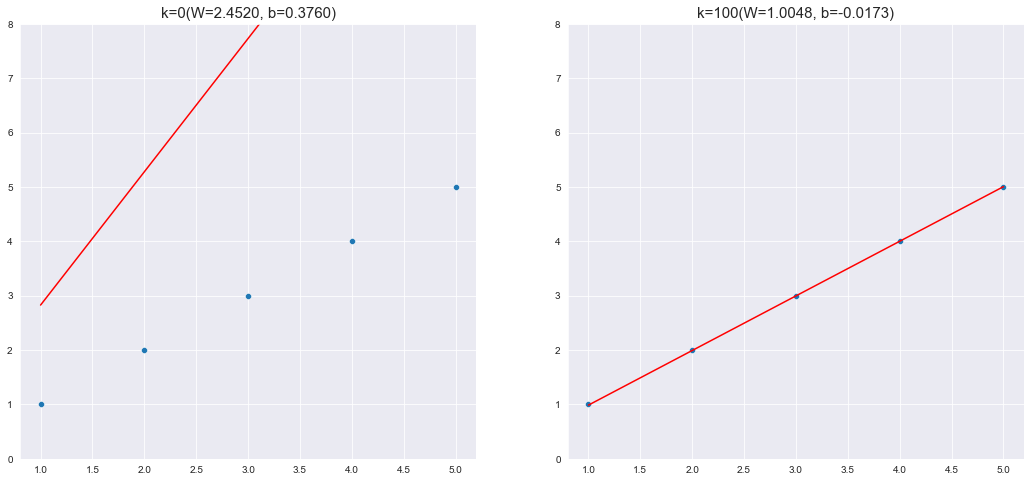

In [105]:
fig,ax = plt.subplots(1,2,figsize=(18,8))

# small epoch
small_slope = result_list[0]

small_data=[]
for k in x_data:
    small_data.append(k*small_slope[0] + small_slope[1])

sns.scatterplot(x=x_data,y=y_data,ax=ax[0])
sns.lineplot(x=x_data,y=small_data,ax=ax[0],color='red')
ax[0].set_ylim(0,8)
ax[0].set_title('k=0(W={:0.4f}, b={:0.4f})'.format(small_slope[0],small_slope[1]),fontsize=15)

# large epoch
large_slope = result_list[10]

large_data=[]
for k in x_data:
    large_data.append(k*large_slope[0] + large_slope[1])

sns.scatterplot(x=x_data,y=y_data,ax=ax[1])
sns.lineplot(x=x_data,y=large_data,ax=ax[1],color='red')
ax[1].set_ylim(0,8)
ax[1].set_title('k=100(W={:0.4f}, b={:0.4f})'.format(large_slope[0],large_slope[1]),fontsize=15)

# With new data

In [107]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
